# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Latitude": city_lat, 
                          "Longitude": city_lng, 
                          "Max Temperature": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | shepsi
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | gunjur
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | kavieng
Processing Record 10 of Set 1 | olafsvik
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | pisco
Processing Record 18 of Set 1 | alice springs
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 21 of Set 1 | jinchang
Processing Record 22 of Set 1 | cape

Processing Record 35 of Set 4 | berlevag
Processing Record 36 of Set 4 | horta
Processing Record 37 of Set 4 | bacolod
Processing Record 38 of Set 4 | luba
Processing Record 39 of Set 4 | dali
Processing Record 40 of Set 4 | belyy yar
Processing Record 41 of Set 4 | central point
Processing Record 42 of Set 4 | yerbogachen
Processing Record 43 of Set 4 | libreville
Processing Record 44 of Set 4 | saint-joseph
Processing Record 45 of Set 4 | ouesso
Processing Record 46 of Set 4 | batagay
Processing Record 47 of Set 4 | valdivia
Processing Record 48 of Set 4 | andra
Processing Record 49 of Set 4 | tessalit
Processing Record 0 of Set 5 | freeport
Processing Record 1 of Set 5 | dikson
Processing Record 2 of Set 5 | maragogi
Processing Record 3 of Set 5 | taywarah
Processing Record 4 of Set 5 | alihe
Processing Record 5 of Set 5 | scottsburgh
City not found. Skipping...
Processing Record 6 of Set 5 | coquimbo
Processing Record 7 of Set 5 | sitka
Processing Record 8 of Set 5 | baracoa
Proces

Processing Record 27 of Set 8 | saint-georges
Processing Record 28 of Set 8 | norman wells
Processing Record 29 of Set 8 | selenginsk
Processing Record 30 of Set 8 | saleaula
City not found. Skipping...
Processing Record 31 of Set 8 | salalah
Processing Record 32 of Set 8 | gerzat
Processing Record 33 of Set 8 | port macquarie
Processing Record 34 of Set 8 | khasan
Processing Record 35 of Set 8 | kubrat
Processing Record 36 of Set 8 | waingapu
Processing Record 37 of Set 8 | ritchie
Processing Record 38 of Set 8 | buraydah
Processing Record 39 of Set 8 | mezen
Processing Record 40 of Set 8 | provideniya
Processing Record 41 of Set 8 | filadelfia
Processing Record 42 of Set 8 | vestmanna
Processing Record 43 of Set 8 | ofunato
Processing Record 44 of Set 8 | nguiu
City not found. Skipping...
Processing Record 45 of Set 8 | brownsville
Processing Record 46 of Set 8 | upernavik
Processing Record 47 of Set 8 | kulhudhuffushi
Processing Record 48 of Set 8 | eureka
Processing Record 49 of Se

Processing Record 17 of Set 12 | shihezi
Processing Record 18 of Set 12 | carutapera
Processing Record 19 of Set 12 | obera
Processing Record 20 of Set 12 | samarai
Processing Record 21 of Set 12 | half moon bay
Processing Record 22 of Set 12 | phumi samraong
City not found. Skipping...
Processing Record 23 of Set 12 | gamba
Processing Record 24 of Set 12 | kapoeta
Processing Record 25 of Set 12 | kurmanayevka
Processing Record 26 of Set 12 | ayan
Processing Record 27 of Set 12 | sivaki
Processing Record 28 of Set 12 | matamoros
Processing Record 29 of Set 12 | gaoyou
Processing Record 30 of Set 12 | maningrida
Processing Record 31 of Set 12 | souillac
Processing Record 32 of Set 12 | southampton
Processing Record 33 of Set 12 | tautira
Processing Record 34 of Set 12 | nokaneng
Processing Record 35 of Set 12 | claveria
Processing Record 36 of Set 12 | verkh-usugli
Processing Record 37 of Set 12 | saint-augustin
Processing Record 38 of Set 12 | gizo
Processing Record 39 of Set 12 | bagh

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City               541
Latitude           541
Longitude          541
Max Temperature    541
Humidity           541
Cloudiness         541
Wind Speed         541
Country            541
Date               541
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,79.70,75,6,12.88,PF,1675303478
1,port elizabeth,-33.9180,25.5701,67.32,84,0,9.22,ZA,1675303478
2,shepsi,44.0361,39.1489,39.63,92,100,9.89,RU,1675303478
3,bluff,-46.6000,168.3333,68.16,80,77,11.21,NZ,1675303479
4,gunjur,13.2019,-16.7339,69.87,56,0,10.36,GM,1675303479


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,79.70,75,6,12.88,PF,1675303478
1,port elizabeth,-33.9180,25.5701,67.32,84,0,9.22,ZA,1675303478
2,shepsi,44.0361,39.1489,39.63,92,100,9.89,RU,1675303478
3,bluff,-46.6000,168.3333,68.16,80,77,11.21,NZ,1675303479
4,gunjur,13.2019,-16.7339,69.87,56,0,10.36,GM,1675303479


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

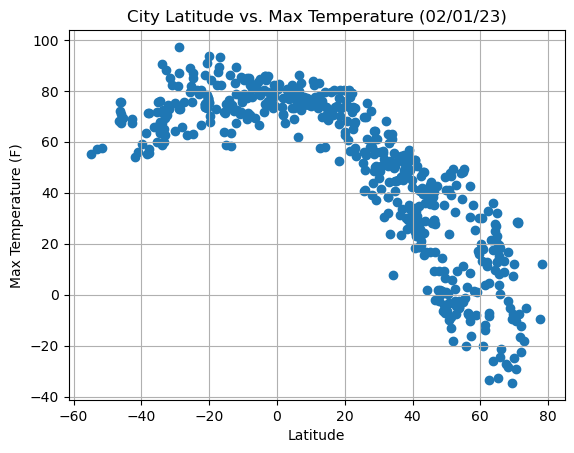

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Latitude"], city_data_df["Max Temperature"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

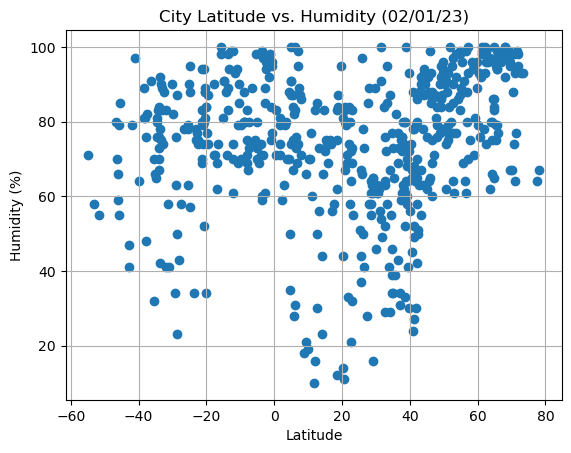

In [9]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

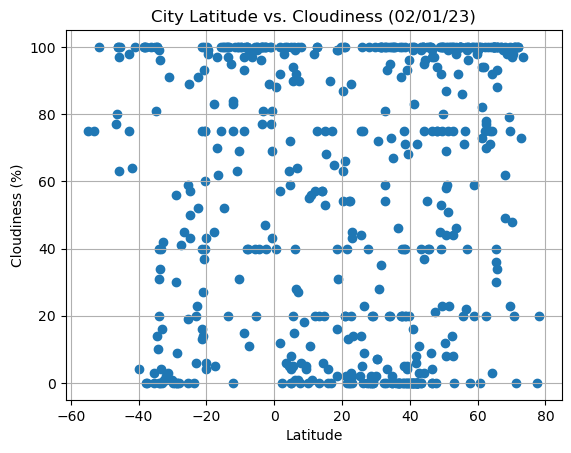

In [10]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Latitude"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

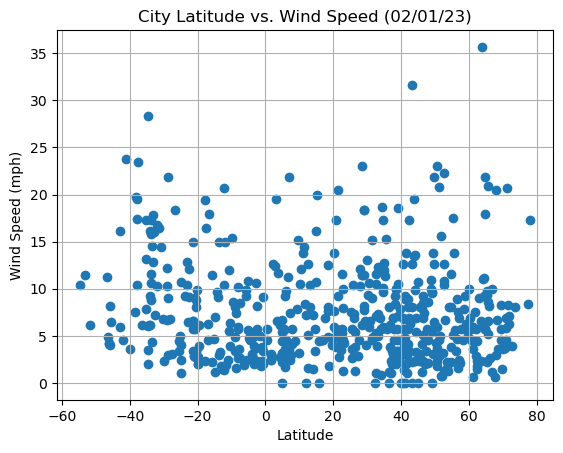

In [11]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Latitude"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def Create_Linear_Regression_Plot(x_values, y_values, ylabeltext, charttitle, labellocation):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    Regress_Values = x_values * slope + intercept
    Line_Equation_Label = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

    # Plot the Regression
    plt.scatter(x_values,y_values)
    plt.plot(x_values,Regress_Values,"red")
    plt.annotate(Line_Equation_Label,labellocation,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabeltext)
    plt.title(charttitle)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Latitude"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,shepsi,44.0361,39.1489,39.63,92,100,9.89,RU,1675303478
4,gunjur,13.2019,-16.7339,69.87,56,0,10.36,GM,1675303479
5,kapaa,22.0752,-159.3190,79.12,74,54,4.00,US,1675303275
7,barrow,71.2906,-156.7887,-7.58,77,0,20.71,US,1675303480
9,olafsvik,64.8945,-23.7142,32.02,65,100,21.90,IS,1675303280


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Latitude"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,79.70,75,6,12.88,PF,1675303478
1,port elizabeth,-33.9180,25.5701,67.32,84,0,9.22,ZA,1675303478
3,bluff,-46.6000,168.3333,68.16,80,77,11.21,NZ,1675303479
6,cidreira,-30.1811,-50.2056,75.22,90,1,6.80,BR,1675303480
8,kavieng,-2.5744,150.7967,85.66,61,100,8.19,PG,1675303241


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7512254093179259


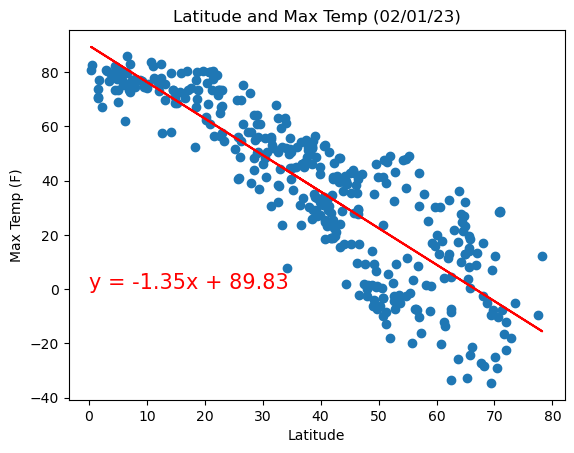

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Max Temperature"]
Create_Linear_Regression_Plot(x_values, y_values, 'Max Temp (F)',"Latitude and Max Temp (%s)" % time.strftime("%x"),(0,0))

The r-value is: 0.22732730604942708


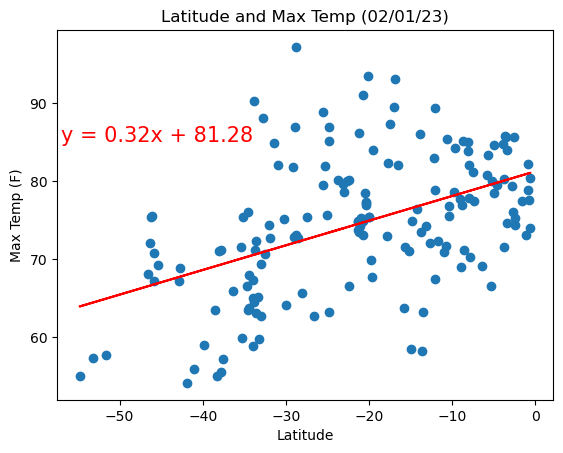

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Max Temperature"]
Create_Linear_Regression_Plot(x_values, y_values, 'Max Temp (F)',"Latitude and Max Temp (%s)" % time.strftime("%x"),(-57,85))

**Discussion about the linear relationship:**
In general, there seems to be a negative linear relationship between Latitude and Max Temperature in the northern hemisphere for February 1, 2023. As the Latitude increases, the Max Temperature tends to decrease to some degree. The opposite is true of the southern hemisphere plot. As the Latitude increases, so does the average Max Temperature (though it is worth noting that the R-Value suggests that Latitude is much less predictive of Max Temperature in the southern hemisphere than in the northern hemisphere).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15227320417230766


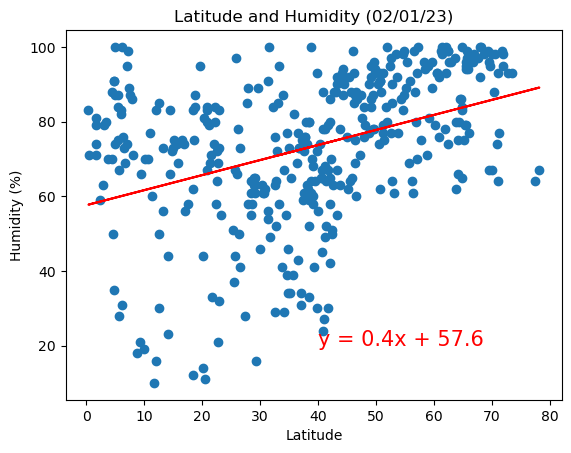

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Humidity"]
Create_Linear_Regression_Plot(x_values, y_values, 'Humidity (%)',"Latitude and Humidity (%s)" % time.strftime("%x"),(40,20))

The r-value is: 0.09545671658765292


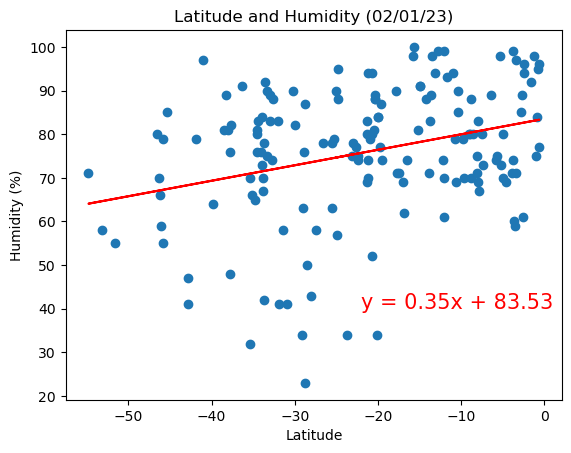

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Humidity"]
Create_Linear_Regression_Plot(x_values, y_values, 'Humidity (%)',"Latitude and Humidity (%s)" % time.strftime("%x"),(-22,40))

**Discussion about the linear relationship:**
In general, there seems to be a positive linear relationship between Latitude and Humidity in both the northern and souther hemispheres for February 1, 2023. However, the relationship is fairly weak in both cases as indicated by neither R-Value exceeding 0.16 on that date.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0773235318574026


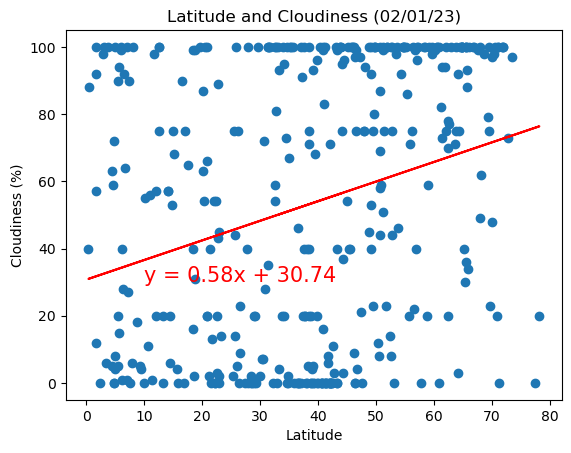

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Cloudiness"]
Create_Linear_Regression_Plot(x_values, y_values, 'Cloudiness (%)',"Latitude and Cloudiness (%s)" % time.strftime("%x"),(10,30))

The r-value is: 0.05543037947803865


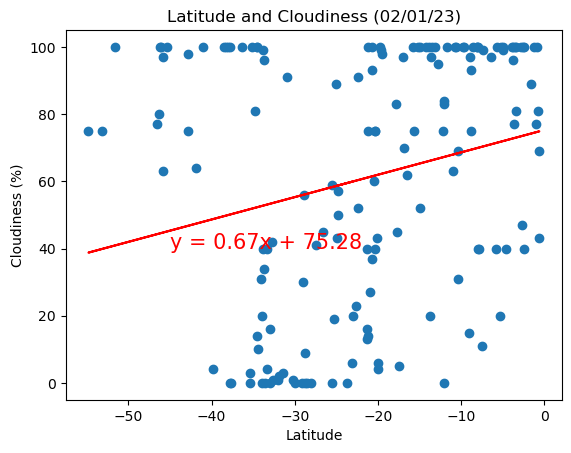

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Cloudiness"]
Create_Linear_Regression_Plot(x_values, y_values, 'Cloudiness (%)',"Latitude and Cloudiness (%s)" % time.strftime("%x"),(-45,40))

**Discussion about the linear relationship:**
There is almost no linear relationship between Latitude and Cloudiness of the cities on February 1, 2023. This is indicated by the fact that both R-Values are hovering around 0.05 to 0.07.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00046194077072602666


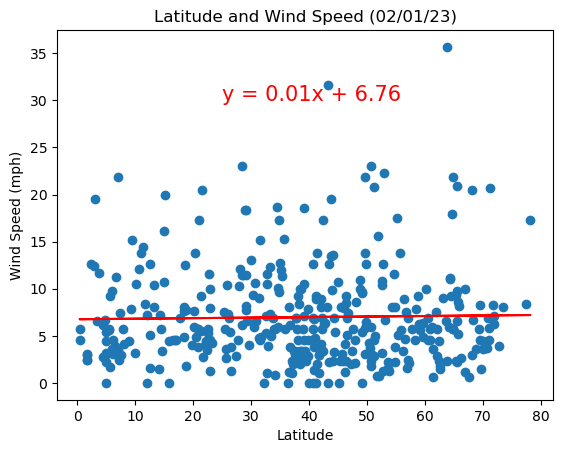

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Wind Speed"]
Create_Linear_Regression_Plot(x_values, y_values, 'Wind Speed (mph)',"Latitude and Wind Speed (%s)" % time.strftime("%x"),(25,30))

The r-value is: 0.12257750565551027


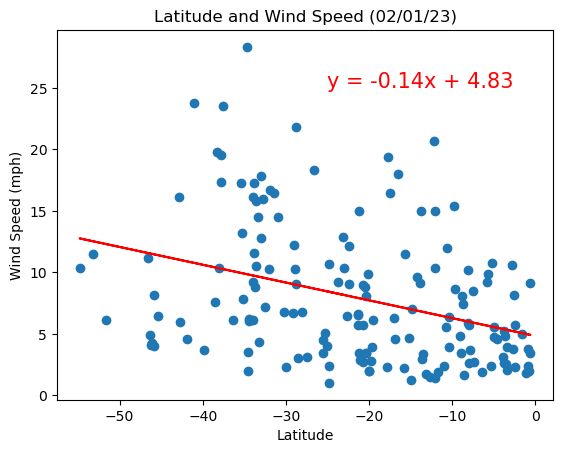

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Wind Speed"]
Create_Linear_Regression_Plot(x_values, y_values, 'Wind Speed (mph)',"Latitude and Wind Speed (%s)" % time.strftime("%x"),(-25,25))

**Discussion about the linear relationship:**
There was a very weak negative relationship between Latitude and Wind Speed in the southern hempisphere when this information was pulled on February 1, 2023. As Latitude increased, Wind Speed decreased. However, that relationship virtually disappears when looking at the northern hemisphere as indicated by its extremely small R-Value.